<a href="https://colab.research.google.com/github/ZahibVentura/M-todos-de-Optimizaci-n-/blob/main/FuncionDiscontinuaLogaritmica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

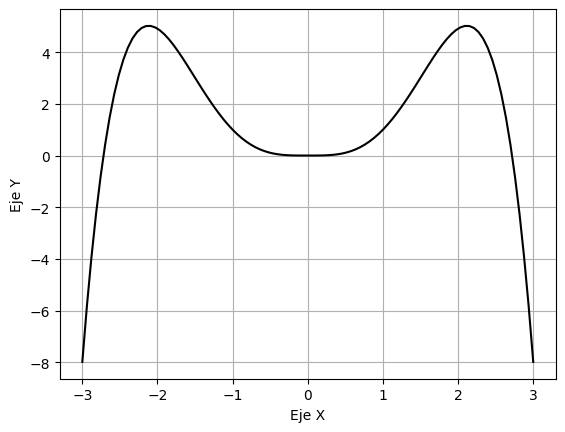

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math

a = -3
b = 3
X = np.linspace(a, b, 100)
Y = -X**4 * (np.log(np.abs(X))-1)

plt.figure()
plt.plot(X, Y, 'k')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.grid()
plt.show()

##Biseccion##

In [29]:

import sympy as sp
#Definimos una funcion que calcula la derivada de la funcion original
def calcularderivada():
  X = sp.Symbol('X')
  Y = -X**4 * (sp.log(np.abs(X))-1)
  d1Y = sp.diff(Y)
  d2Y = sp.diff(d1Y)
  print(Y)
  print(d1Y)
  print(d2Y)
  return None



In [30]:
calcularderivada()

-X**4*(log(Abs(X)) - 1)
-X**3*(re(X)*Derivative(re(X), X) + im(X)*Derivative(im(X), X))*sign(X)/Abs(X) - 4*X**3*(log(Abs(X)) - 1)
-X**3*(re(X)*Derivative(re(X), X) + im(X)*Derivative(im(X), X))*Derivative(sign(X), X)/Abs(X) - X**3*(re(X)*Derivative(re(X), (X, 2)) + im(X)*Derivative(im(X), (X, 2)) + Derivative(re(X), X)**2 + Derivative(im(X), X)**2)*sign(X)/Abs(X) + X**2*(re(X)*Derivative(re(X), X) + im(X)*Derivative(im(X), X))**2*sign(X)**2/Abs(X)**2 - 7*X**2*(re(X)*Derivative(re(X), X) + im(X)*Derivative(im(X), X))*sign(X)/Abs(X) - 12*X**2*(log(Abs(X)) - 1)


In [33]:
# Segunda Deriva
def d2Y(X):
  return -12*X**2 * np.log(np.abs(X)) + 5*X**2

In [31]:
# Funcion original
def Y(X):
  return -X**4 * (np.log(np.abs(X))-1)

In [32]:
# Primer Derivada
def dY(X):
  return -4*X**3 * np.log(np.abs(X)) + 3*X**3

In [44]:
 # Método de biseccion en python
import numpy as np
def biseccion():
    a = -3
    b = 0
    epsilon = 0.001

    cont = 0
    registro = []

    while(True):
        alpha = (a+b)/2

        # Primera derivada en a
        dY_a = dY(a)

        #Primera derivada en alpha
        dY_alpha = dY(alpha)

        if(dY_a*dY_alpha < 0):
            b = alpha
        else:
            a = alpha
        Ya = Y(a)

        # Condicion de finalizacion
        if(np.abs(a-b) < epsilon):
            print('-------------------------------------------------------------')
            print("It: {:02} - Eje X: {:.10f} - Eje Y: {:.10f}".format(cont, a, Ya))
            break

        cont = cont + 1
        registro.append([cont, a, Ya])
        print("It: {:02} - Eje X: {:.10f} - Eje X: {:.10f}".format(cont, a, Ya))

    return registro




In [45]:
reg1 = biseccion()

It: 01 - Eje X: -3.0000000000 - Eje X: -7.9875953821
It: 02 - Eje X: -2.2500000000 - Eje X: 4.8456517633
It: 03 - Eje X: -2.2500000000 - Eje X: 4.8456517633
It: 04 - Eje X: -2.2500000000 - Eje X: 4.8456517633
It: 05 - Eje X: -2.1562500000 - Eje X: 5.0071445429
It: 06 - Eje X: -2.1562500000 - Eje X: 5.0071445429
It: 07 - Eje X: -2.1328125000 - Eje X: 5.0191150614
It: 08 - Eje X: -2.1210937500 - Eje X: 5.0212335320
It: 09 - Eje X: -2.1210937500 - Eje X: 5.0212335320
It: 10 - Eje X: -2.1181640625 - Eje X: 5.0213720743
It: 11 - Eje X: -2.1181640625 - Eje X: 5.0213720743
-------------------------------------------------------------
It: 11 - Eje X: -2.1174316406 - Eje Y: 5.0213825604


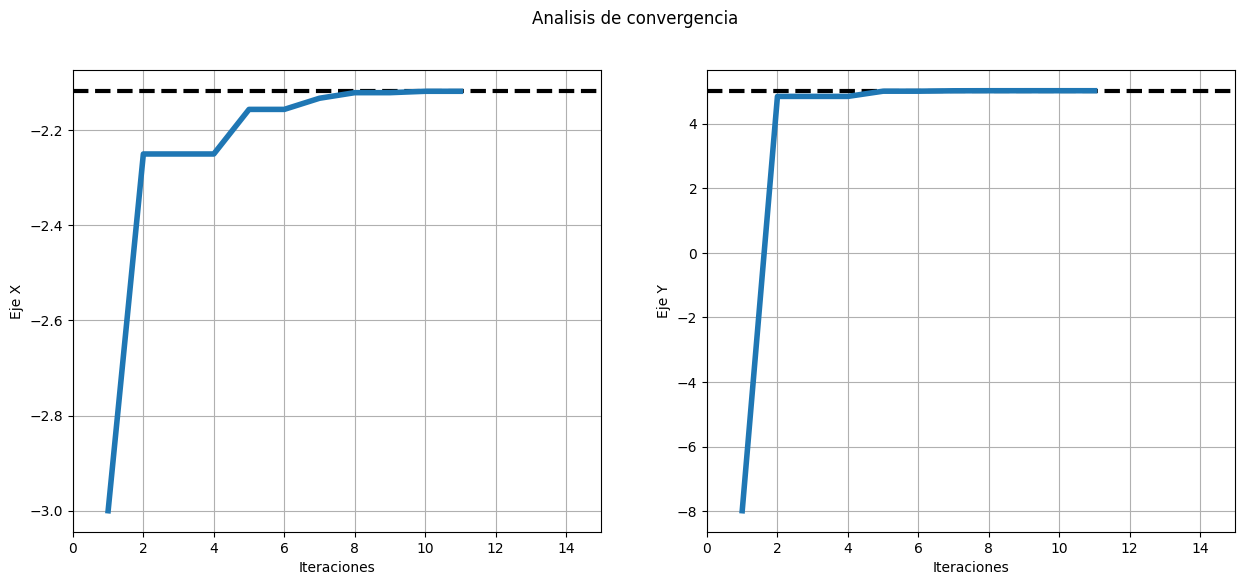

In [47]:
def evaluacion(reg):
    reg = np.array(reg)
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    fig.suptitle('Analisis de convergencia')

    axs[0].axhline(-2.117, color='k', linewidth=3, linestyle='--')
    axs[0].plot(reg[:, 0], reg[:, 1], linewidth=4)
    axs[0].set_xlabel('Iteraciones')
    axs[0].set_ylabel('Eje X')
    axs[0].grid()
    axs[0].set_xlim([0, 15])

    axs[1].axhline(5.021, color='k', linewidth=3, linestyle='--')
    axs[1].plot(reg[:, 0], reg[:, 2], linewidth=4)
    axs[1].set_xlabel('Iteraciones')
    axs[1].set_ylabel('Eje Y')
    axs[1].grid()
    axs[1].set_xlim([0, 15])

    plt.show()


evaluacion(reg1)

##Secante##


In [55]:
def Secante():
    a= -3
    b= -0.1
    epsilon = 0.001

    cont = 0
    registro = []

    while True:
        # calcular f'(a)
        dY_a = dY(a)

        # calcular f'(b)
        dY_b= dY(b)

        # calcular alpha
        alpha = b - dY_b / ((dY_b - dY_a)/(b - a))

        dY_alpha = dY(alpha)

        if dY_alpha < 0:
            b = alpha
        else:
            a = alpha

        Y1_alpha = Y(alpha)

        cont = cont + 1

        registro.append([cont, alpha, Y1_alpha])
        print("It: {:02d} - Eje X: {:.10f} - Eje Y: {:.10f}".format(cont, alpha, Y1_alpha))

        if np.abs(dY_alpha) <= epsilon:
            print("------------------------------------------------------------------------")
            print("It: {:02d} - Eje X: {:.10f} - Eje Y: {:.10f}".format(cont, alpha, Y1_alpha))
            break

    return registro

In [56]:
reg2 = Secante()

It: 01 - Eje X: -0.1009401962 - Eje Y: 0.0003418836
It: 02 - Eje X: -0.1019038768 - Eje Y: 0.0003541030
It: 03 - Eje X: -0.1028919898 - Eje Y: 0.0003669568
It: 04 - Eje X: -0.1039055361 - Eje Y: 0.0003804882
It: 05 - Eje X: -0.1049455734 - Eje Y: 0.0003947443
It: 06 - Eje X: -0.1060132205 - Eje Y: 0.0004097761
It: 07 - Eje X: -0.1071096612 - Eje Y: 0.0004256390
It: 08 - Eje X: -0.1082361500 - Eje Y: 0.0004423937
It: 09 - Eje X: -0.1093940168 - Eje Y: 0.0004601059
It: 10 - Eje X: -0.1105846732 - Eje Y: 0.0004788478
It: 11 - Eje X: -0.1118096184 - Eje Y: 0.0004986981
It: 12 - Eje X: -0.1130704469 - Eje Y: 0.0005197430
It: 13 - Eje X: -0.1143688555 - Eje Y: 0.0005420771
It: 14 - Eje X: -0.1157066524 - Eje Y: 0.0005658043
It: 15 - Eje X: -0.1170857659 - Eje Y: 0.0005910390
It: 16 - Eje X: -0.1185082555 - Eje Y: 0.0006179073
It: 17 - Eje X: -0.1199763223 - Eje Y: 0.0006465482
It: 18 - Eje X: -0.1214923223 - Eje Y: 0.0006771158
It: 19 - Eje X: -0.1230587801 - Eje Y: 0.0007097806
It: 20 - Eje

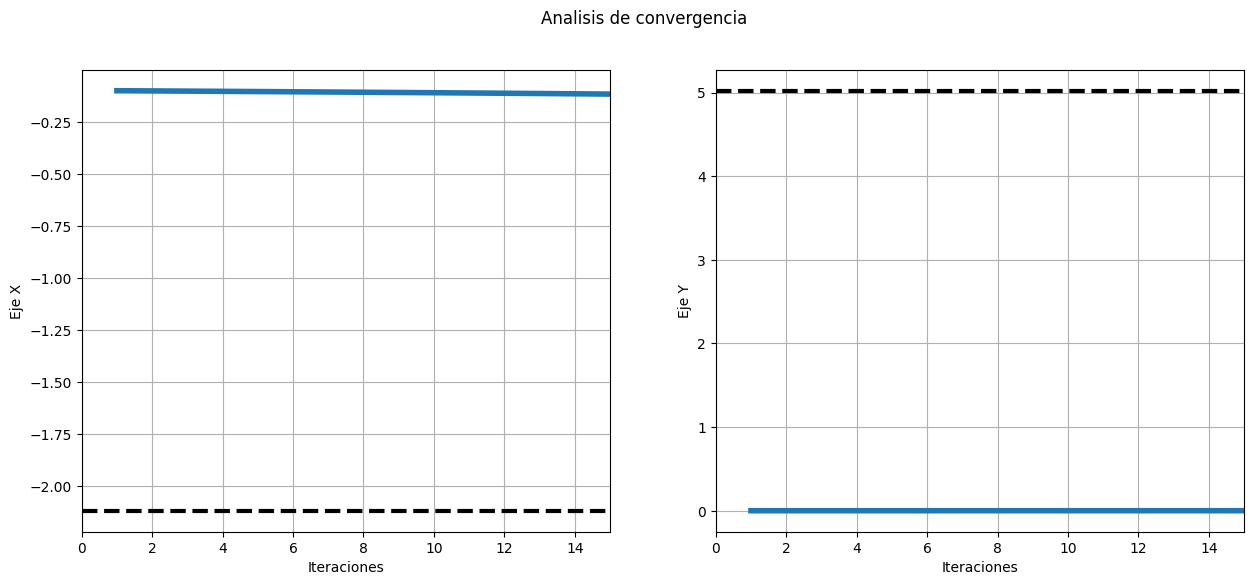

In [57]:
def evaluacion(reg):
    reg = np.array(reg)
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    fig.suptitle('Analisis de convergencia')

    axs[0].axhline(-2.117, color='k', linewidth=3, linestyle='--')
    axs[0].plot(reg[:, 0], reg[:, 1], linewidth=4)
    axs[0].set_xlabel('Iteraciones')
    axs[0].set_ylabel('Eje X')
    axs[0].grid()
    axs[0].set_xlim([0, 15])

    axs[1].axhline(5.021, color='k', linewidth=3, linestyle='--')
    axs[1].plot(reg[:, 0], reg[:, 2], linewidth=4)
    axs[1].set_xlabel('Iteraciones')
    axs[1].set_ylabel('Eje Y')
    axs[1].grid()
    axs[1].set_xlim([0, 15])

    plt.show()


evaluacion(reg2)

##Metodo de NewtonRaphson##

In [62]:
def NewtonRaphson():
    a = -3
    b = 0
    x = -1
    epsilon = 0.001

    cont = 0
    registro = []

    while True:
        # Calculo de f'(x) y f''(x)
        dY_x = dY(x)
        d2Y_x = d2Y(x)

        xprev = x
        x = xprev - dY_x/d2Y_x

        Y_x = Y(x)

        cont = cont + 1
        registro.append([cont, x, Y_x])

        print("It: {:02d} - Eje X: {:.10f} - Eje Y: {:.10f}".format(cont, x, Y_x))

        if(np.abs(x - xprev) <= epsilon):
            print("----------------------------------------------------------------")
            print("It: {:02d} - Eje X: {:.10f} - Eje Y: {:.10f}".format(cont, x, Y_x))
            break

    return registro

In [63]:
reg3 = NewtonRaphson()

It: 01 - Eje X: -0.4000000000 - Eje Y: 0.0490570427
It: 02 - Eje X: -0.2333239323 - Eje Y: 0.0072769029
It: 03 - Eje X: -0.1417004838 - Eje Y: 0.0011909723
It: 04 - Eje X: -0.0878257205 - Eje Y: 0.0002042137
It: 05 - Eje X: -0.0551253550 - Eje Y: 0.0000359968
It: 06 - Eje X: -0.0349024579 - Eje Y: 0.0000064630
It: 07 - Eje X: -0.0222401531 - Eje Y: 0.0000011758
It: 08 - Eje X: -0.0142415432 - Eje Y: 0.0000002160
It: 09 - Eje X: -0.0091553934 - Eje Y: 0.0000000400
It: 10 - Eje X: -0.0059045251 - Eje Y: 0.0000000075
It: 11 - Eje X: -0.0038181137 - Eje Y: 0.0000000014
It: 12 - Eje X: -0.0024745222 - Eje Y: 0.0000000003
It: 13 - Eje X: -0.0016068440 - Eje Y: 0.0000000000
----------------------------------------------------------------
It: 13 - Eje X: -0.0016068440 - Eje Y: 0.0000000000


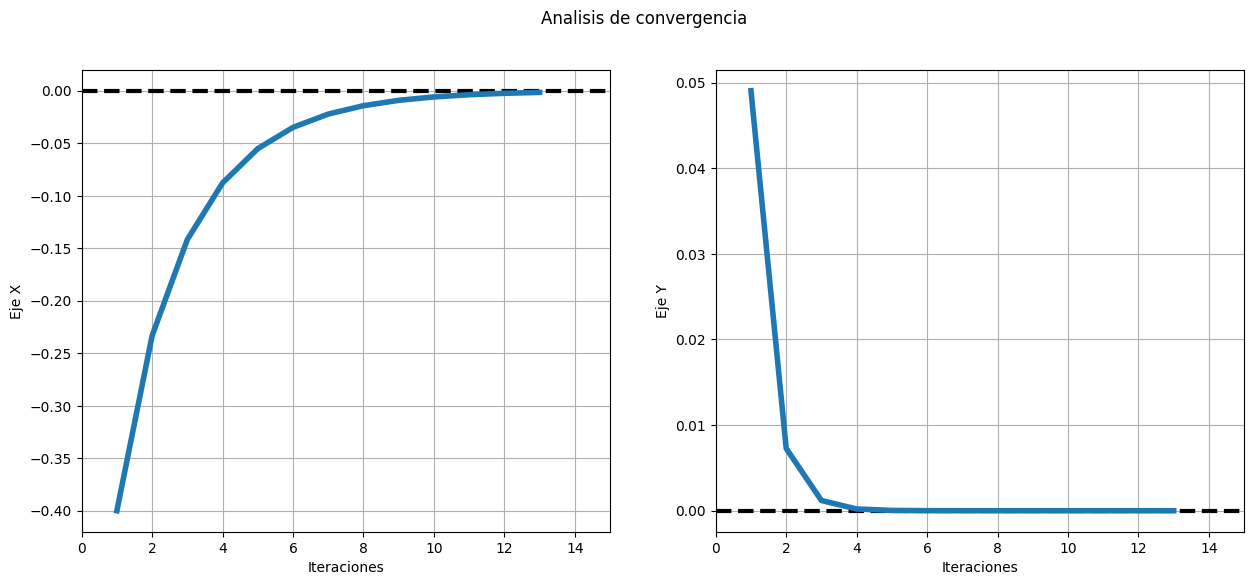

In [64]:
def evaluacion(reg):
    reg = np.array(reg)
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    fig.suptitle('Analisis de convergencia')

    axs[0].axhline(0, color='k', linewidth=3, linestyle='--')
    axs[0].plot(reg[:, 0], reg[:, 1], linewidth=4)
    axs[0].set_xlabel('Iteraciones')
    axs[0].set_ylabel('Eje X')
    axs[0].grid()
    axs[0].set_xlim([0, 15])

    axs[1].axhline(0, color='k', linewidth=3, linestyle='--')
    axs[1].plot(reg[:, 0], reg[:, 2], linewidth=4)
    axs[1].set_xlabel('Iteraciones')
    axs[1].set_ylabel('Eje Y')
    axs[1].grid()
    axs[1].set_xlim([0, 15])

    plt.show()


evaluacion(reg3)

##Seccion Dorada##

In [65]:
def GoldenSectionSearch():
    a = -3
    b = 0
    tau = 2 - 1.618033988
    epsilon = 0.00001

    cont = 0
    registro = []

    while(True):
        # Calcular alpha1 y alpha2
        alpha1 = a*(1 - tau) + b*tau
        alpha2 = a*tau + b*(1 - tau)

        # Calcular f(alpha1) y f(alpha2)
        Y_alpha1 = Y(alpha1)
        Y_alpha2 = Y(alpha2)

        if(Y_alpha1 < Y_alpha2):
            a = alpha1
        else:
            b = alpha2

        cont = cont + 1
        registro.append([cont, alpha1, Y_alpha1])
        print("It: {:02d} - Eje X: {:.10f} - Eje Y: {:.10f}".format(cont, alpha1, Y_alpha1))

        if(np.abs(Y_alpha1 - Y_alpha2) < epsilon):
            print("-------------------------------------------------------")
            print("It: {:02d} - Eje X: {:.10f} - Eje Y: {:.10f}".format(cont, alpha1, Y_alpha1))
            break

    return registro

In [66]:
reg4 = GoldenSectionSearch()

It: 01 - Eje X: -1.8541019640 - Eje Y: 4.5214621183
It: 02 - Eje X: -2.2917960670 - Eje Y: 4.7081063062
It: 03 - Eje X: -2.5623058990 - Eje Y: 2.5471561669
It: 04 - Eje X: -2.2917960682 - Eje Y: 4.7081063017
It: 05 - Eje X: -2.1246117986 - Eje Y: 5.0208617813
It: 06 - Eje X: -2.1884705073 - Eje Y: 4.9729748046
It: 07 - Eje X: -2.1246117989 - Eje Y: 5.0208617813
It: 08 - Eje X: -2.1490036551 - Eje Y: 5.0119704061
It: 09 - Eje X: -2.1246117990 - Eje Y: 5.0208617813
It: 10 - Eje X: -2.1095368029 - Eje Y: 5.0208879023
It: 11 - Eje X: -2.1152949391 - Eje Y: 5.0213582066
It: 12 - Eje X: -2.1188536629 - Eje Y: 5.0213533876
-------------------------------------------------------
It: 12 - Eje X: -2.1188536629 - Eje Y: 5.0213533876


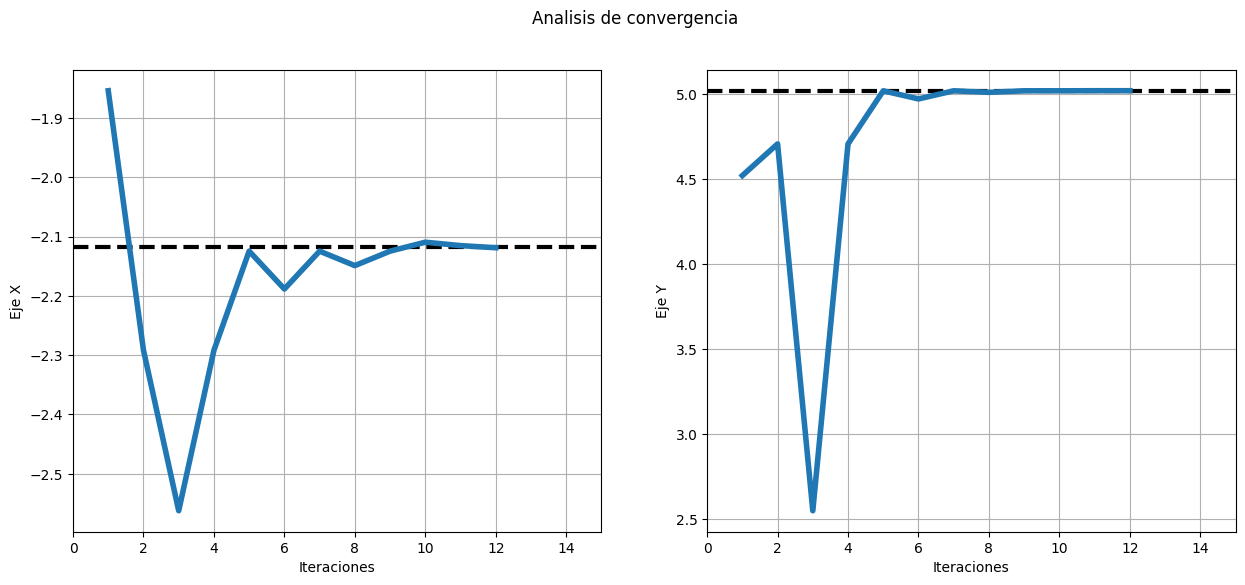

In [67]:
def evaluacion(reg):
    reg = np.array(reg)
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    fig.suptitle('Analisis de convergencia')

    axs[0].axhline(-2.117, color='k', linewidth=3, linestyle='--')
    axs[0].plot(reg[:, 0], reg[:, 1], linewidth=4)
    axs[0].set_xlabel('Iteraciones')
    axs[0].set_ylabel('Eje X')
    axs[0].grid()
    axs[0].set_xlim([0, 15])

    axs[1].axhline(5.021, color='k', linewidth=3, linestyle='--')
    axs[1].plot(reg[:, 0], reg[:, 2], linewidth=4)
    axs[1].set_xlabel('Iteraciones')
    axs[1].set_ylabel('Eje Y')
    axs[1].grid()
    axs[1].set_xlim([0, 15])

    plt.show()


evaluacion(reg4)

##Fibonacci##

In [68]:
def Fibonacci(*params):
    a   = params[0]
    b   = params[1]
    k   = params[2]
    it  = params[3]
    reg = params[4]
    L   = params[5]
    n   = params[6]
    fs  = params[7]
    ep  = params[8]

    i_arriba = n - k + 1
    i_abajo = n + 1
    Lk = L*fs[i_arriba]/fs[i_abajo]

    xa = a + Lk
    xb = b - Lk

    Y_xa = Y(xa)
    Y_xb = Y(xb)

    if(Y_xa < Y_xb):
        a = xa
    else:
        b = xb

    if(np.abs(Y_xa-Y_xb) > ep):
        k = k + 1
        it = it + 1

        reg.append([it, xa, Y_xa])
        print("It: {:02d} - Eje X: {:.10f} - Eje Y: {:.10f}".format(it, xa, Y_xa))

        return Fibonacci(a, b, k, it, reg, L, n, fs, ep)
    else:
        print("-------------------------------------------------------")
        print("It: {:02d} - Eje X: {:.10f} - Eje Y: {:.10f}".format(it, xa, Y_xa))

        return reg

In [69]:
def RunFibonacci():
    n = 30

    fs = [1, 1]
    for i in range(n):
        aux = fs[-1] + fs[-2]
        fs.append(aux)

    a, b, k = -3, 0, 2
    L = b - a

    return Fibonacci(a, b, k, 0, [], b-a, n, fs, 0.0001)



In [70]:
reg5 = RunFibonacci()

It: 01 - Eje X: -1.8541019662 - Eje Y: 4.5214621259
It: 02 - Eje X: -2.2917960675 - Eje Y: 4.7081063042
It: 03 - Eje X: -2.5623058987 - Eje Y: 2.5471561695
It: 04 - Eje X: -2.2917960675 - Eje Y: 4.7081063042
It: 05 - Eje X: -2.1246117975 - Eje Y: 5.0208617815
It: 06 - Eje X: -2.1884705063 - Eje Y: 4.9729748061
It: 07 - Eje X: -2.1246117975 - Eje Y: 5.0208617815
It: 08 - Eje X: -2.1490036538 - Eje Y: 5.0119704069
-------------------------------------------------------
It: 08 - Eje X: -2.1246117975 - Eje Y: 5.0208617815


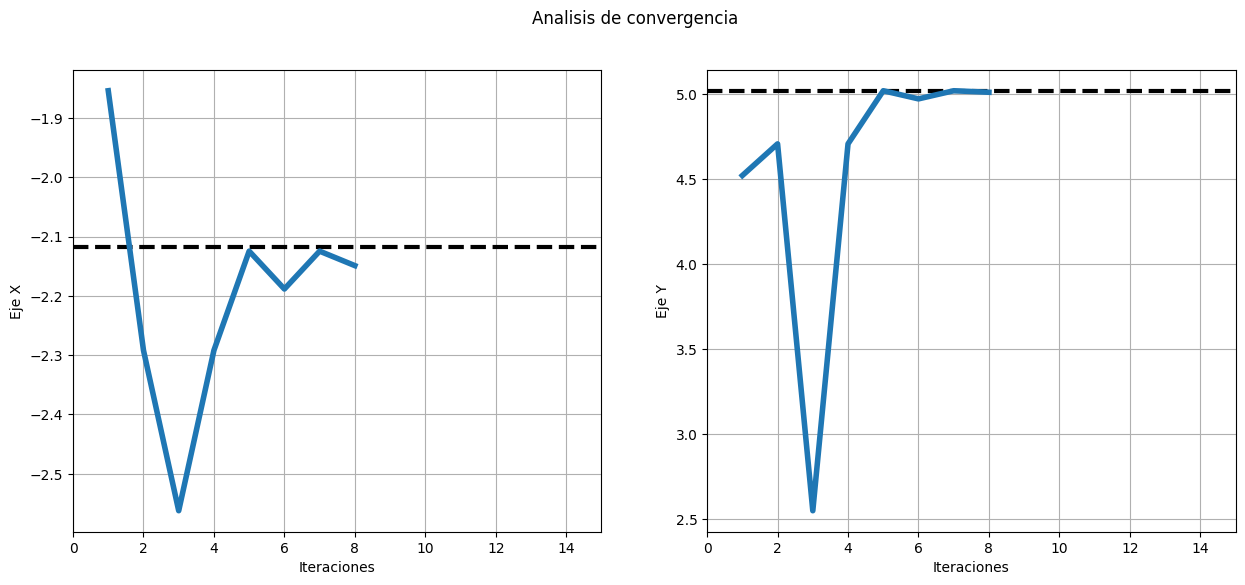

In [71]:
def evaluacion(reg):
    reg = np.array(reg)
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    fig.suptitle('Analisis de convergencia')

    axs[0].axhline(-2.117, color='k', linewidth=3, linestyle='--')
    axs[0].plot(reg[:, 0], reg[:, 1], linewidth=4)
    axs[0].set_xlabel('Iteraciones')
    axs[0].set_ylabel('Eje X')
    axs[0].grid()
    axs[0].set_xlim([0, 15])

    axs[1].axhline(5.021, color='k', linewidth=3, linestyle='--')
    axs[1].plot(reg[:, 0], reg[:, 2], linewidth=4)
    axs[1].set_xlabel('Iteraciones')
    axs[1].set_ylabel('Eje Y')
    axs[1].grid()
    axs[1].set_xlim([0, 15])

    plt.show()


evaluacion(reg5)